In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
import glob
import os 
import ipywidgets

from utilities import Log

In [9]:

IS_UNIX_FILE_SYSTEM = False

LOGS_PATH = f"{os.path.dirname(os.getcwd())}\\logs\\heatmaps\\*"
def strip_dir_func(is_unix):
    if is_unix:
        return lambda el : el[el.rfind("/") + 1:]
    else:
        return lambda el : el[el.rfind("\\") + 1:]
dropdown_options = list(map(strip_dir_func(IS_UNIX_FILE_SYSTEM), glob.glob(LOGS_PATH)))
ipywidgets.interact(lambda x : None, x=ipywidgets.widgets.Dropdown(options=dropdown_options, 
description="Selected Experiment Folder:", 
style={"description_width": "initial"}),
)


interactive(children=(Dropdown(description='Selected Experiment Folder:', options=('fazildgr8',), style=Descri…

<function __main__.<lambda>(x)>

In [10]:
EXPERIMENT_PATH = f"{LOGS_PATH[:-1]}fazildgr8\\*.txt"
log_objects = [Log(full_path=file_path, unix_file=IS_UNIX_FILE_SYSTEM) for file_path in glob.glob(EXPERIMENT_PATH)]

log_objects.sort(key=lambda el: el.stage)
# Assuming each experiment had the same amount of stages completed, we can find the highest stage 
# and figure out the number of experiments/sample size n 
highest_stage = -1
for i in range(len(log_objects)):
    if highest_stage < log_objects[i].stage: 
        highest_stage = log_objects[i].stage
num_experiments = len(log_objects) // (highest_stage + 1) 

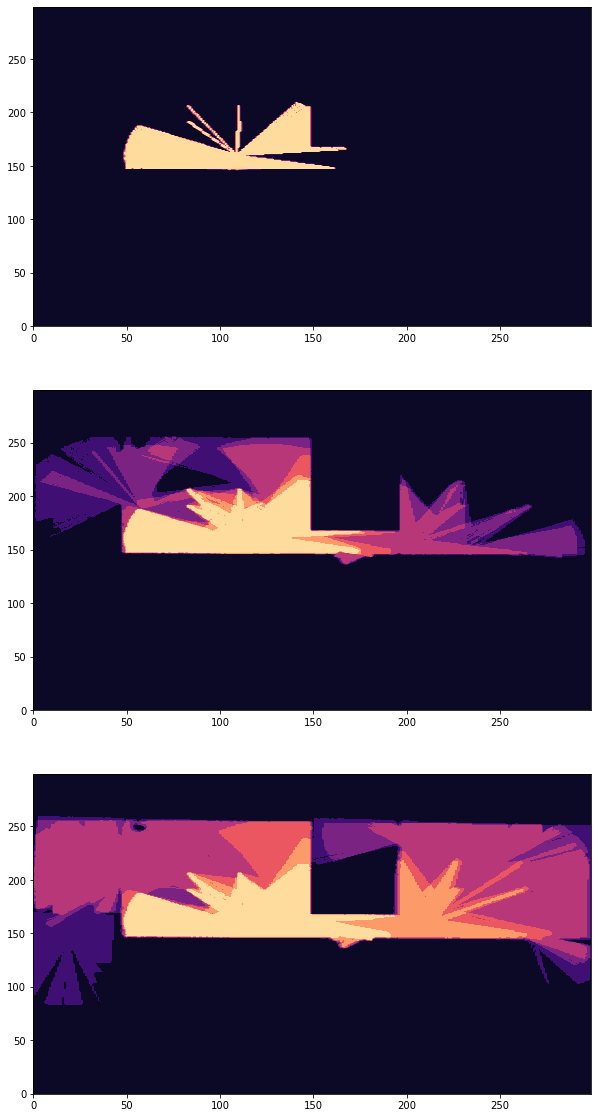

In [11]:
fig, axs = plt.subplots(highest_stage + 1, 1, figsize= (10,20))
for i in range(0, highest_stage + 1):    
    arr = None
    for j in range(num_experiments): 
        if arr is None: 
            arr = (np.loadtxt(log_objects[j + i * num_experiments].path) >= 0) / num_experiments
        else:
            arr += (np.loadtxt(log_objects[j + i * num_experiments].path) >= 0) / num_experiments
    axs[i].contourf(arr, cmap=cm.magma)
    if log_objects[0].unit == "second":
        axs[i].set_title(f"Robot Exploration Progress at Stage {i}, {log_objects[i * num_experiments].unit_value} Seconds Explored")
    elif log_objects[0].unit == "proportion":
        axs[i].set_title(f"Robot Exploration Progress at Stage {i}, {log_objects[i * num_experiments].unit_value} Proportion Explored")
